In [877]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [878]:
def cvshow(img):
    assert len(img.shape) == 3, "Image must have 3 channels"
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

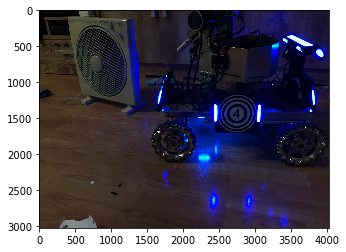

In [1095]:
img = cv2.imread('./blue.jpg')
h, w, _ = img.shape
cvshow(img)

Text(0.5,1,'Red Channel')

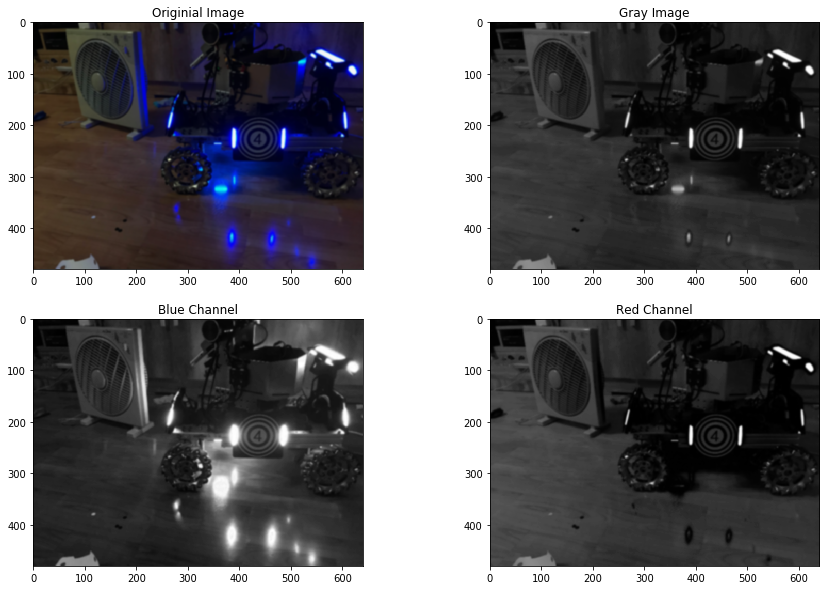

In [1096]:
img = cv2.resize(img, (640, 480))
img = cv2.GaussianBlur(img, (7,7), 0)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blue = img[:,:,0].astype('float32')
red = img[:,:,2].astype('float32')
green = img[:,:,1].astype('float32')
plt.figure(figsize=(15, 10))
plt.subplot(221)
cvshow(img)
plt.title('Originial Image')
plt.subplot(222)
plt.imshow(gray, 'gray')
plt.title('Gray Image')
plt.subplot(223)
plt.imshow(blue, 'gray')
plt.title('Blue Channel')
plt.subplot(224)
plt.imshow(red, 'gray')
plt.title('Red Channel')

In [1097]:
row1 = gray[180, :]
row2 = gray[240, :]

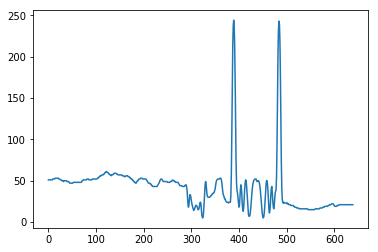

In [1098]:
sig = row2
plt.plot(sig)

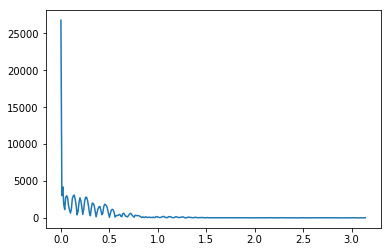

In [1099]:
sig_dft = np.fft.rfft(sig)
omega = np.linspace(0, np.pi, sig_dft.shape[0])
plt.plot(omega, np.absolute(sig_dft))

Text(0.5,1,'Sobel Edge With Angle')

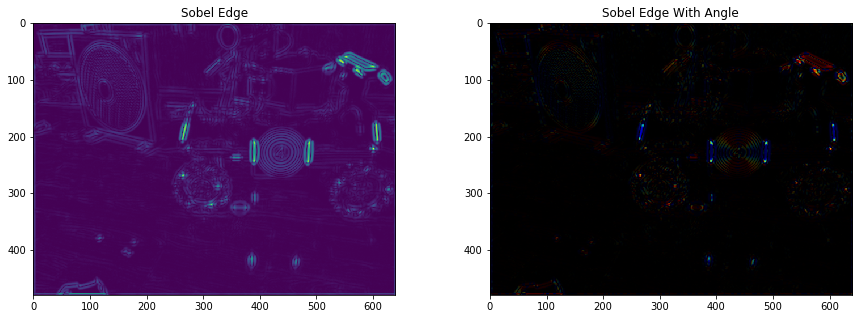

In [1100]:
fmap = gray
sobel_x = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
sobel_x = np.array([[-1, -2, 1, 1, 1, 1, 1, 1, -2, -1]])
sobel_y = sobel_x.T
gx = signal.convolve2d(fmap, sobel_x, 'same')
gy = signal.convolve2d(fmap, sobel_y, 'same')
g = np.sqrt(gx**2 + gy**2)
theta = np.arctan2(gy, gx)
theta[theta<-np.pi/2] += np.pi
theta[theta>np.pi/2] -= np.pi

cmap = plt.get_cmap('jet')
theta_img = cmap(theta)
theta_img = theta_img[:,:,:3]
theta_img = theta_img * g[:,:,None] / g.max()

plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.imshow(g)
plt.title('Sobel Edge')
plt.subplot(122)
plt.imshow(theta_img)
plt.title('Sobel Edge With Angle')

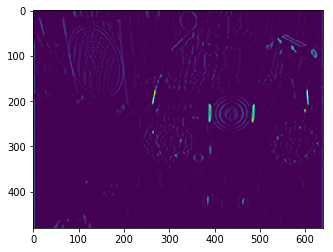

In [1101]:
th = 0
g_new = np.maximum(gx, th) - th
ero_kernel = np.ones((8,3))
dil_kernel = np.ones((1,5))
#er_img = cv2.erode(g_new, ero_kernel)
#di_img = cv2.dilate(g_new, dil_kernel)
plt.imshow(g_new)

<Container object of 3 artists>

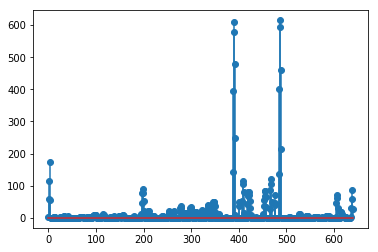

In [1102]:
row1 = g_new[210]
plt.stem(row1)

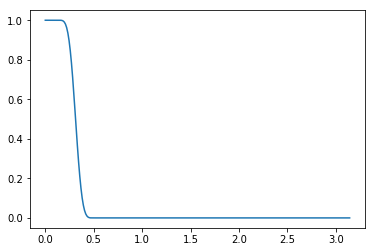

In [1103]:
hft = signal.remez(101, [0, 0.05, 0.15, 1], [1, 0], fs=2)
hft_dft = np.fft.rfft(hft, 512)
omega = np.linspace(0, np.pi, hft_dft.shape[0])
plt.plot(omega, np.absolute(hft_dft))

<Container object of 3 artists>

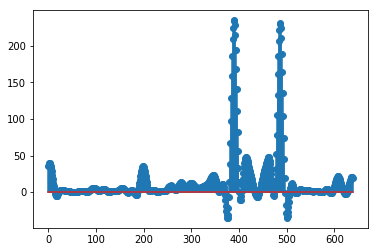

In [1104]:
ret = signal.convolve2d(g_new, hft[None], 'same')
plt.stem(ret[210])

-42.60605679172337 249.9235247601382


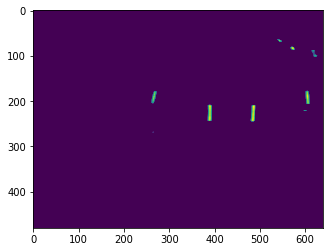

In [1105]:
th = 150
plt.imshow(np.maximum(ret, th))
print(ret.min(), ret.max())

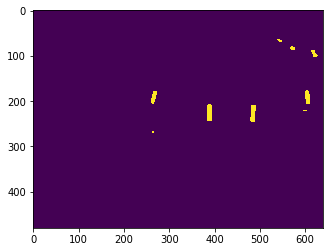

In [1106]:
bmask = np.zeros(ret.shape, dtype=int)
bmask[ret >= th] = 1024
bmask[ret < th] = 0
plt.imshow(bmask)

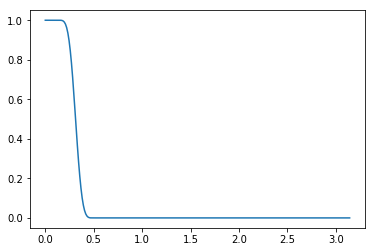

In [1107]:
vft = signal.remez(101, [0, 0.02, 0.1, 1], [1, 0], fs=2)
vft_dft = np.fft.rfft(hft, 512)
omega = np.linspace(0, np.pi, hft_dft.shape[0])
plt.plot(omega, np.absolute(vft_dft))

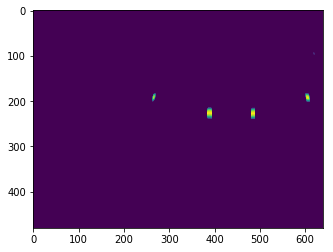

In [1108]:
final = signal.convolve2d(bmask, vft[:, None], 'same')
final = np.maximum(final, 800)
plt.imshow(final)